In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('household_power_consumption.txt',
             	sep=';',
             	parse_dates={'datetime': ['Date', 'Time']},
             	infer_datetime_format=True,
             	na_values=['?'],
             	low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')


C:\Users\91880\AppData\Local\Temp\ipykernel_16932\39740622.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt',
C:\Users\91880\AppData\Local\Temp\ipykernel_16932\39740622.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',
C:\Users\91880\AppData\Local\Temp\ipykernel_16932\39740622.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',


In [4]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [5]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2049280, freq=None)

In [6]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
from groq import Groq
import requests

In [ ]:
API_Key_groq = "Your API Key Here"

In [9]:
groq = Groq(api_key=API_Key_groq)

In [10]:
 
url = "https://api.groq.com/openai/v1/models"

headers = {
    "Authorization": f"Bearer {API_Key_groq}",
    "Content-Type": "application/"
    
}

# Make the GET request
response = requests.get(url, headers=headers)
 
# Extract JSON data
json_data = response.json()

# Extract the "data" field which contains the model details
data = json_data.get("data", [])

# Convert to DataFrame
models = pd.DataFrame(data)
models


,id,object,created,owned_by,active,context_window,public_apps,max_completion_tokens
0,compound-beta,model,1740880017,Groq,True,131072,None,8192
1,llama3-8b-8192,model,1693721698,Meta,True,8192,None,8192
2,qwen/qwen3-32b,model,1748396646,Alibaba Cloud,True,131072,None,40960
3,whisper-large-v3-turbo,model,1728413088,OpenAI,True,448,None,448
4,llama-3.1-8b-instant,model,1693721698,Meta,True,131072,None,131072
5,playai-tts,model,1740682771,PlayAI,True,8192,None,8192
6,llama-guard-3-8b,model,1693721698,Meta,True,8192,None,8192
7,meta-llama/llama-prompt-guard-2-22m,model,1748632101,Meta,True,512,None,512
8,deepseek-r1-distill-llama-70b,model,1737924940,DeepSeek / Meta,True,131072,None,131072
9,meta-llama/llama-4-maverick-17b-128e-instruct,model,1743877158,Meta,True,131072,None,8192


## Questions To be asked:

1. What was the average active power consumption in March 2007?
2. What hour of the day had the highest power usage on Christmas 2006?
3. Compare energy usage (Global_active_power) on weekdays vs weekends.
4. Find days where energy consumption exceeded 5 kWh.
5. Plot the energy usage trend for the first week of January 2007.
6. Find the average voltage for each day of the first week of February 2007.
7. What is the correlation between global active power and sub-metering values?




In [12]:
import warnings
import re
warnings.filterwarnings('ignore')

In [13]:
df.groupby(df.index.dayofweek)['Global_active_power'].mean()

datetime
0    0.999546
1    1.069796
2    1.082588
3    0.981809
4    1.043394
5    1.248335
6    1.220188
Name: Global_active_power, dtype: float64

In [82]:
questions = [
    "What was the average active power consumption in March 2007?",
    "What hour of the day had the highest power usage on Christmas 2006?",
    "Compare energy usage (Global_active_power) on weekdays vs weekends.",
    "Find days where energy consumption exceeded 5 kWh.",
    "Plot the energy usage trend for the first week of January 2007.",
    "Find the average voltage for each day of the first week of February 2007.",
    "What is the correlation between global active power and sub-metering values?"
]

actual_code = [
    "df.loc['2007-03', 'Global_active_power'].mean()",
    "df.loc['2006-12-25'].resample('h').sum()['Global_active_power'].idxmax().hour",
    "df.groupby(df.index.dayofweek)['Global_active_power'].mean()",
    "df.index = pd.to_datetime(df.index)\ndf['Energy_kWh'] = df['Global_active_power'] / 60\ndaily_energy = df['Energy_kWh'].resample('D').sum()\nhigh_energy_days = daily_energy[daily_energy > 5]\nprint(high_energy_days.index.date)",
    "df.loc['2007-01-01':'2007-01-07', 'Global_active_power'].plot()",
    "df.loc['2007-02-01':'2007-02-07'].resample('D').mean()['Voltage']",
    "df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr().loc['Global_active_power', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]"
]

generated_code = [
    "",  # The generated code for Q1 from chat_completion1/csv_content
    "",  # Placeholder for other generated codes
    "",
    "",
    "",
    "",
    ""
]

correct_ans = [
    df.loc['2007-03', 'Global_active_power'].mean(),
    None,
    None,
    None,
    None,
    None,
    None
]

generated_ans = [
    eval(generated_code[0]) if generated_code[0] else None,
    None,
    None,
    None,
    None,
    None,
    None
]

qa_df = pd.DataFrame({
    'questions': questions,
    'actual_code': actual_code,
    'generated_code': generated_code,
    'correct_ans': correct_ans,
    'generated_ans': generated_ans
})

qa_df

,questions,actual_code,generated_code,correct_ans,generated_ans
0,What was the average active power consumption ...,"df.loc['2007-03', 'Global_active_power'].mean()",,1.318627,None
1,What hour of the day had the highest power usa...,df.loc['2006-12-25'].resample('h').sum()['Glob...,,NaN,None
2,Compare energy usage (Global_active_power) on ...,df.groupby(df.index.dayofweek)['Global_active_...,,NaN,None
3,Find days where energy consumption exceeded 5 ...,df.index = pd.to_datetime(df.index)\ndf['Energ...,,NaN,None
4,Plot the energy usage trend for the first week...,"df.loc['2007-01-01':'2007-01-07', 'Global_acti...",,NaN,None
5,Find the average voltage for each day of the f...,df.loc['2007-02-01':'2007-02-07'].resample('D'...,,NaN,None
6,What is the correlation between global active ...,"df[['Global_active_power', 'Sub_metering_1', '...",,NaN,None


In [83]:

def getans(question):
    chat_completion = groq.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a pandas expert that gives pandas code to answer questions about the data.\n"
                    "Index of the dataframe is a datetime index.\n"
                    "The dataframe is named df.\n"
                    "These are the columns in the dataframe: "
                    f"{', '.join(df.columns)}.\n"
                    "This is the head of the dataframe:\n"
                    f"{df.head().to_string()}\n"
                    "The frequency of the datetime index is every minute.\n"
                    "Based on this information, please provide the pandas code to answer the user's question.\n"
                    "Make sure to import any necessary libraries at the top of the code.\n"
                    # "If the question requres a single value answer, a dataframe, or a plot, return the code that produces that output.\n"
                    "Don't return any text other than the code.\n"
                    "Print the result at the end of the code.\n"
                    "Index of the DataFrame is a datetime index with frequency every minute.\n"
                    "Return only executable code - no explanations or markdown formatting like ```Python  ```\n" 
                    "If you want to use some date use df.loc['2006-12'] like this"
                    
                )

            },
            {
                "role": "user",
                "content": question
            }
        ],
        model='qwen-qwq-32b',
        temperature=0.5,
        stream=False,
    )

    output = chat_completion.choices[0].message.content
    code = re.sub(r"<think>.*?</think>", "", output, flags=re.DOTALL).strip()
    code = re.sub(r"```python\s*([\s\S]*?)\s*```", r"\1", code, flags=re.DOTALL).strip()
    return code

In [75]:
import ast, textwrap, json

In [ ]:
def eval_generated(code: str):
    """
    Run the snippet in an isolated namespace that receives a *deep* copy of df.
    Whatever the user code does to that copy will not affect the original df.
    """
    sandbox = {"df": df.copy(deep=True)}   # deep copy isolates the data[3]
    exec(textwrap.dedent(code), sandbox)   # run user code
    return sandbox.get("_") 

Question [0]: What was the average active power consumption in March 2007?
--------------------------------------------------------------------------------
Generated code:

import pandas as pd

average_power = df.loc['2007-03', 'Global_active_power'].mean()
print(average_power)
--------------------------------------------------------------------------------
Generated Answer:

1.3186270301754073
None
Question [1]: What hour of the day had the highest power usage on Christmas 2006?
--------------------------------------------------------------------------------
Generated code:

import pandas as pd

# Filter data for Christmas Day 2006
christmas_day = df.loc['2006-12-25']

# Calculate hourly average of Global_active_power
hourly_avg = christmas_day['Global_active_power'].resample('H').mean()

# Find the timestamp of the hour with the highest average power
peak_time = hourly_avg.idxmax()

# Extract the hour of the day
result = peak_time.hour

print(result)
---------------------------------

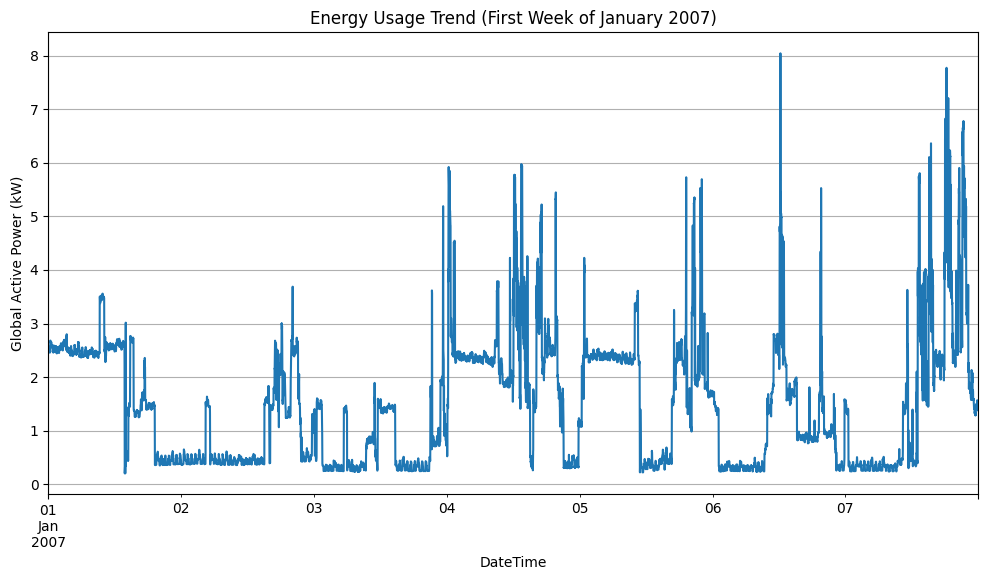

None
Question [5]: Find the average voltage for each day of the first week of February 2007.
--------------------------------------------------------------------------------
Generated code:

import pandas as pd

result = df.loc['2007-02-01':'2007-02-07']['Voltage'].resample('D').mean()
print(result)
--------------------------------------------------------------------------------
Generated Answer:

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Freq: D, Name: Voltage, dtype: float64
None
Question [6]: What is the correlation between global active power and sub-metering values?
--------------------------------------------------------------------------------
Generated code:

import pandas as pd

# Calculate the correlation matrix between Global_active_power and Sub_metering columns
correlation_matrix = df[['Global_active_power', 'Sub_metering_1', 'Sub_me

In [69]:
for _, row in qa_df.iterrows():
    generated_code = getans(row['questions'])
    print("="*80)
    print(f"Question [{_}]: {row['questions']}")
    print("-"*80)
    print("Generated code:\n")
    print(generated_code)
    print("-"*80)
    qa_df.at[_, 'generated_code'] = generated_code
    print("Generated Answer:\n")
    print(eval_generated(generated_code))
